##### 切換圖文選單
延伸「建立圖文選單」文章，LINE 可以設定「多組」圖文選單，每一組之間都可透過指令切換 ( 有點類似切換網頁選單的概念 )，\
這篇教學會介紹如何設定多組圖文選單、設定圖文選單別名 Alias ID，以及切換不同的圖文選單。

##### 設定圖文選單 A 
下載圖文選單 A 的範例圖片，將圖片放在與 Colab 程式同樣的雲端資料夾裡。
* https://steam.oxxostudio.tw/download/python/line-rich-menu-switch-demo-a.jpg
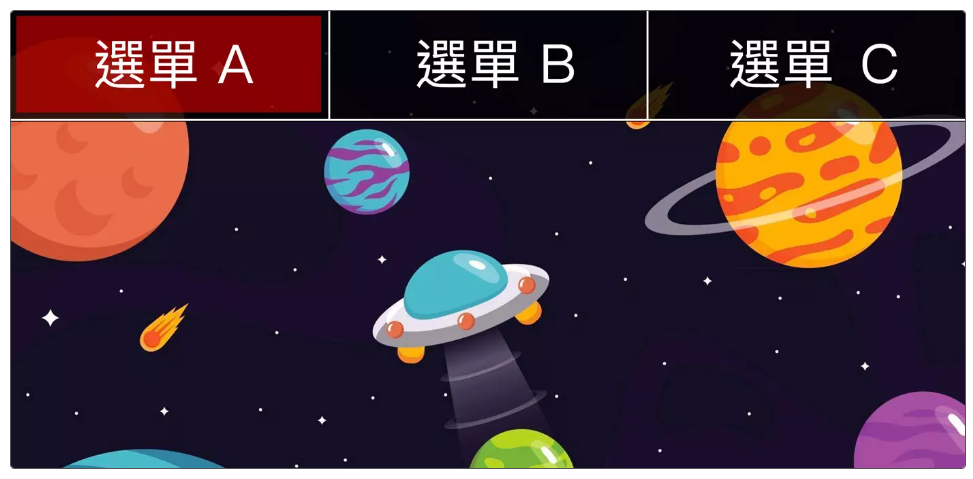

使用 Colab 開啟新的程式碼，使用下方的程式，輸入自己的 access token，設定第一個圖文選單 ( 選單 A ) 的內容，設定的重點如下：
* name 設定為 aaa，表示別名 Alias Id。
* 預設有三個按鈕，第一個連結到選單 A 按鈕行為設定為 postback，點擊後會在背後送出 postback，不會有顯示的反應。
* 連結到選單 B 和 C 的按鈕，設定為 richmenuswitch，richMenuAliasId 設定為 bbb 和 ccc。

In [ ]:
import requests, json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}

body = {
    'size': {'width': 2500, 'height': 1200},   # 設定尺寸
    'selected': 'true',                        # 預設是否顯示
    'name': 'aaa',                             # 選單名稱 ( 別名 Alias Id )
    'chatBarText': '選單 A',                    # 選單在 LINE 顯示的標題
    'areas':[                                  # 選單內容
        {
          'bounds': {'x': 0, 'y': 0, 'width': 830, 'height': 280},
          'action': {'type': 'postback', 'data':'no-data'}          # 按鈕 A 使用 postback
        },
        {
          'bounds': {'x': 835, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'bbb', 'data':'change-to-bbb'} # 按鈕 B 使用 richmenuswitch
        },
        {
          'bounds': {'x': 1670, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'ccc', 'data':'change-to-ccc'} # 按鈕 C 使用 richmenuswitch
        }
    ]
  }
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

上方程式碼執行後，會得到圖文選單 A 的 id，將 id、圖片在雲端硬碟中的位址、access token 填入下方程式碼，執行後就會將圖片與圖文選單綁定

In [ ]:
from linebot import LineBotApi, WebhookHandler
line_bot_api = LineBotApi('你的 access token')
with open("/content/drive/MyDrive/Colab Notebooks/line-rich-menu-switch-demo-a.jpg", 'rb') as f:
    line_bot_api.set_rich_menu_image("圖文選單 id", "image/jpeg", f)

最後執行下方程式碼，將圖文選單 id 和別名 Alias id 綁定。

In [ ]:
import requests
import json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}
body = {
    "richMenuAliasId":"aaa",
    "richMenuId":"圖文選單 id"
}
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu/alias',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

最後執行下方程式碼，將圖文選單傳送到對應的 LINE 機器人。

In [ ]:
import requests
headers = {"Authorization":"Bearer 你的 access token","Content-Type":"application/json"}
req = requests.request('POST', 'https://api.line.me/v2/bot/user/all/richmenu/圖文選單 id', headers=headers)
print(req.text)

##### 設定圖文選單 B 
下載圖文選單 B 的範例圖片，將圖片放在與 Colab 程式同樣的雲端資料夾裡。
* https://steam.oxxostudio.tw/download/python/line-rich-menu-switch-demo-b.jpg

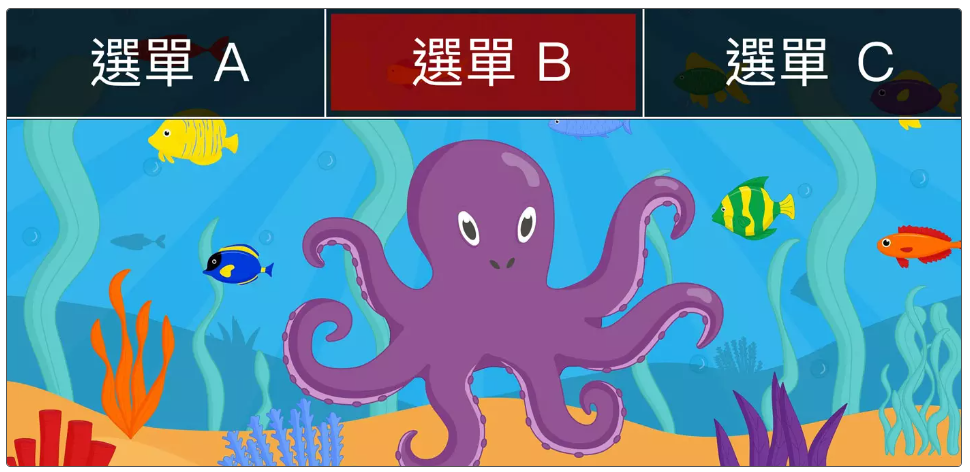

使用 Colab 開啟新的程式碼，使用下方的程式，輸入自己的 access token，設定第一個圖文選單 ( 選單 B ) 的內容，設定的重點如下：
* name 設定為 bbb，表示別名 Alias Id。
* 預設有三個按鈕，第二個連結到選單 B 按鈕行為設定為 postback，點擊後會在背後送出 postback，不會有顯示的反應。
* 連結到選單 A 和 C 的按鈕，設定為 richmenuswitch，richMenuAliasId 設定為 aaa 和 ccc。

In [ ]:
import requests, json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}

body = {
    'size': {'width': 2500, 'height': 1200},   # 設定尺寸
    'selected': 'true',                        # 預設是否顯示
    'name': 'bbb',                             # 選單名稱 ( 別名 Alias Id )
    'chatBarText': '選單 B',                    # 選單在 LINE 顯示的標題
    'areas':[                                  # 選單內容
        {
          'bounds': {'x': 0, 'y': 0, 'width': 830, 'height': 280},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'aaa', 'data':'change-to-aaa'} # 按鈕 A 使用 richmenuswitch
        },
        {
          'bounds': {'x': 835, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'postback', 'data':'no-data'}          # 按鈕 B 使用 postback
        },
        {
          'bounds': {'x': 1670, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'ccc', 'data':'change-to-ccc'} # 按鈕 C 使用 richmenuswitch
        }
    ]
  }
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

上方程式碼執行後，會得到圖文選單 B 的 id，將 id、圖片在雲端硬碟中的位址、access token 填入下方程式碼，執行後就會將圖片與圖文選單綁定

In [ ]:
from linebot import LineBotApi, WebhookHandler
line_bot_api = LineBotApi('你的 access token')
with open("/content/drive/MyDrive/Colab Notebooks/line-rich-menu-switch-demo-b.jpg", 'rb') as f:
    line_bot_api.set_rich_menu_image("圖文選單 id", "image/jpeg", f)

最後執行下方程式碼，將圖文選單 id 和別名 Alias id 綁定。

In [ ]:
import requests
import json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}
body = {
    "richMenuAliasId":"bbb",
    "richMenuId":"圖文選單 id"
}
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu/alias',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

執行下方程式碼，將圖文選單傳送到對應的 LINE 機器人。

In [ ]:
import requests
headers = {"Authorization":"Bearer 你的 access token","Content-Type":"application/json"}
req = requests.request('POST', 'https://api.line.me/v2/bot/user/all/richmenu/圖文選單 id', headers=headers)
print(req.text)

##### 設定圖文選單 C 
下載圖文選單 C 的範例圖片，將圖片放在與 Colab 程式同樣的雲端資料夾裡。
* https://steam.oxxostudio.tw/download/python/line-rich-menu-switch-demo-c.jpg

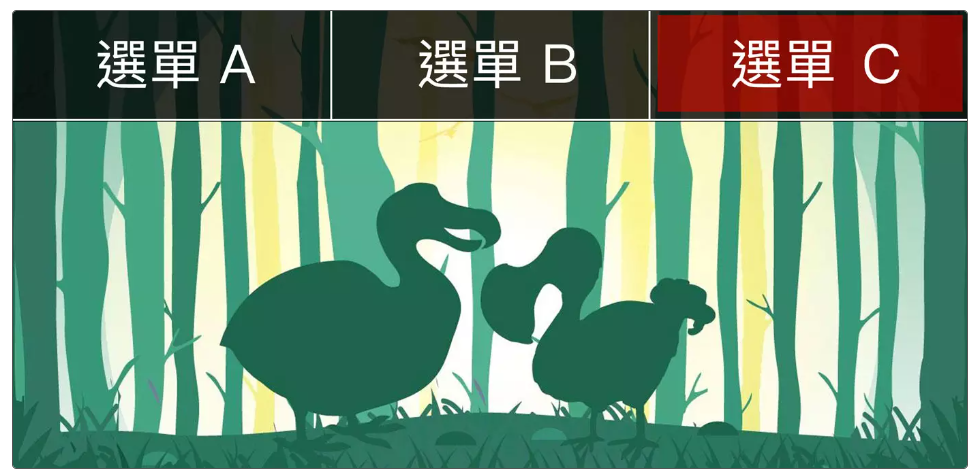

使用 Colab 開啟新的程式碼，使用下方的程式，輸入自己的 access token，設定第一個圖文選單 ( 選單 C ) 的內容，設定的重點如下：
* name 設定為 bbb，表示別名 Alias Id。
* 預設有三個按鈕，第三個連結到選單 C 按鈕行為設定為 postback，點擊後會在背後送出 postback，不會有顯示的反應。
* 連結到選單 A 和 B 的按鈕，設定為 richmenuswitch，richMenuAliasId 設定為 aaa 和 bbb。

In [ ]:
import requests, json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}

body = {
    'size': {'width': 2500, 'height': 1200},   # 設定尺寸
    'selected': 'true',                        # 預設是否顯示
    'name': 'ccc',                             # 選單名稱 ( 別名 Alias Id )
    'chatBarText': '選單 C',                    # 選單在 LINE 顯示的標題
    'areas':[                                  # 選單內容
        {
          'bounds': {'x': 0, 'y': 0, 'width': 830, 'height': 280},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'aaa', 'data':'change-to-aaa'} # 按鈕 A 使用 richmenuswitch
        },
        {
          'bounds': {'x': 835, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'richmenuswitch', 'richMenuAliasId': 'bbb', 'data':'change-to-ccc'} # 按鈕 B 使用 richmenuswitch
        },
        {
          'bounds': {'x': 1670, 'y': 0, 'width':830, 'height': 640},
          'action': {'type': 'postback', 'data':'no-data'}          # 按鈕 C 使用 postback
        }
    ]
  }
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

上方程式碼執行後，會得到圖文選單 C 的 id，將 id、圖片在雲端硬碟中的位址、access token 填入下方程式碼，執行後就會將圖片與圖文選單綁定

In [ ]:
from linebot import LineBotApi, WebhookHandler
line_bot_api = LineBotApi('你的 access token')
with open("/content/drive/MyDrive/Colab Notebooks/line-rich-menu-switch-demo-c.jpg", 'rb') as f:
    line_bot_api.set_rich_menu_image("圖文選單 id", "image/jpeg", f)

最後執行下方程式碼，將圖文選單 id 和別名 Alias id 綁定。

In [ ]:
import requests
import json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}
body = {
    "richMenuAliasId":"ccc",
    "richMenuId":"圖文選單 id"
}
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu/alias',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

執行下方程式碼，將圖文選單傳送到對應的 LINE 機器人。

In [ ]:
import requests
headers = {"Authorization":"Bearer 你的 access token","Content-Type":"application/json"}
req = requests.request('POST', 'https://api.line.me/v2/bot/user/all/richmenu/圖文選單 id', headers=headers)
print(req.text)

##### 執行結果 
三個選單都完成後，開啟 LINE 機器人，在對話視窗的下方就會出現圖文選單，點擊按鈕就能切換圖文選單。

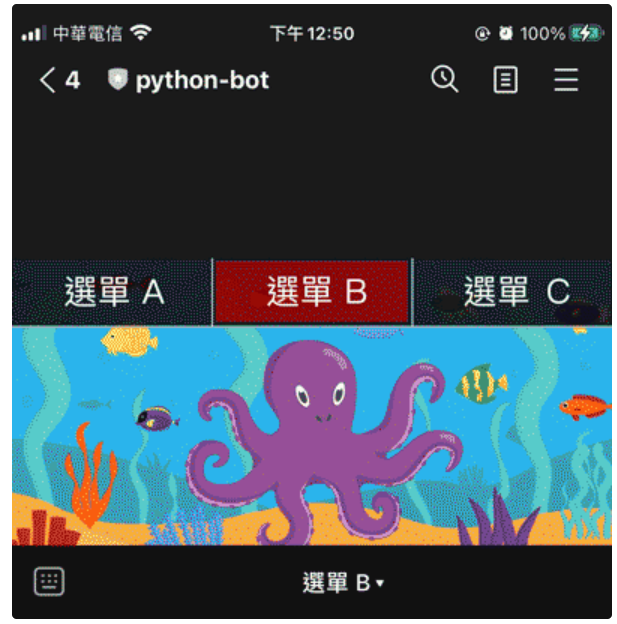